In [ ]:
import json
import re
import pandas as pd
import urllib
from urllib.request import Request
from bs4 import BeautifulSoup


In [ ]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://zegluj.pl/mazury?date_from=01-05-2024&date_to=07-05-2024&page="

pages = []
for page_number in range(1, 18):
    print(f'Pobieranie strony {page_number}')
    with urllib.request.urlopen(f'{url}{page_number}') as resp:
        processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        pages.append(processed_page)


Pobieranie strony 1
Pobieranie strony 2
Pobieranie strony 3
Pobieranie strony 4
Pobieranie strony 5
Pobieranie strony 6
Pobieranie strony 7
Pobieranie strony 8
Pobieranie strony 9
Pobieranie strony 10
Pobieranie strony 11
Pobieranie strony 12
Pobieranie strony 13
Pobieranie strony 14
Pobieranie strony 15
Pobieranie strony 16
Pobieranie strony 17


In [ ]:
full_yacht_data = []
for page in pages:

    full_yacht_data += page.find_all(class_='yacht-box')

In [ ]:
full_yacht_data

[<div class="yacht-box">
 <div class="row">
 <div class="col-md-4 yacht-box__column yacht-box__column--overflowed">
 <div class="yacht-box__badge badge badge--positive">
 Bez patentu
 </div>
 <div class="yacht-box__image">
 <a href="/jacht/sasanka-600-viva/229#/avail/date_from=01-05-2024/date_to=07-05-2024/"><img alt="Mazury czarter - Sasanka 600 Viva" src="/system/yacht_cms_images/images/000/019/632/medium/sasanka-600-viva-1676896816.jpg?1676896815"/>
 </a><div class="yacht-box__location">
 <blockquote>Rydzewo, port Tło dla Mew</blockquote>
 </div>
 </div>
 </div>
 <div class="col-md-8 yacht-box__column">
 <div class="yacht-box__content">
 <div class="row">
 <div class="col-sm-7 yacht-box-content__left">
 <div class="yacht-box__title">
 <h3 class="yacht-box__name">
 Sasanka 600 Viva
 </h3>
 <div class="yacht-box__votescounter">
 <div id="details_more_info"></div>
 <a class="yacht-box__votes" href="/jacht/sasanka-600-viva/229/yacht_reviews#/avail/date_from=01-05-2024/date_to=07-05-2024

In [ ]:
import re

yachts_data = []
for yacht_html in full_yacht_data:
    yacht = {}
    yacht['name'] = yacht_html.find(class_="yacht-box__name").text.strip()
    yacht['price'] = float(yacht_html.find(class_="price right").span.contents[0].replace(' ', '').replace('zł', '').replace('PLN', ''))
    yacht['img'] = f"https://zegluj.pl{yacht_html.img['src']}"
    yacht['url'] = f"https://zegluj.pl{yacht_html.find(class_='yacht-box__image').a['href']}"
    # parameters
    for param_row in yacht_html.select('li.yacht-box-info__item'):
        param_data = param_row.find_all('div')
        param_type = param_data[0].text.strip()
        param_value = re.sub(r'\s+', '', param_data[1].text.strip())
        if 'osób' in param_type:
            #yacht['people'] = param_value
            try:
              yacht['people'] = int(param_value.split('-')[-1])
            except ValueError:
              yacht['people'] = None
        elif 'kabin' in param_type:
            try:
                yacht['cabins'] = int(param_value.split('-')[-1])
            except ValueError:
                yacht['cabins'] = None
            # yacht['cabins'] = int(param_value)
        elif 'produkcji' in param_type:
            yacht['year'] = param_value

    yachts_data.append(yacht)


In [ ]:
yachts_data

[{'name': 'Tango 780 Family',
  'price': 1152.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/023/214/medium/tango-780-family-1688069181.jpg?1688069181',
  'url': 'https://zegluj.pl/jacht/tango-780-family/279#/avail/date_from=01-05-2024/date_to=07-05-2024/',
  'people': 6,
  'cabins': 0,
  'year': '2011'},
 {'name': 'Sasanka 600 Viva',
  'price': 1160.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/004/595/medium/sasanka-600-viva-1668789784.jpg?1668789784',
  'url': 'https://zegluj.pl/jacht/sasanka-600-viva/657#/avail/date_from=01-05-2024/date_to=07-05-2024/',
  'people': 4,
  'cabins': 0,
  'year': '2020'},
 {'name': 'Tango 780 Sport',
  'price': 1260.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/023/269/medium/tango-780-sport-1688069219.jpg?1688069218',
  'url': 'https://zegluj.pl/jacht/tango-780-sport/268#/avail/date_from=01-05-2024/date_to=07-05-2024/',
  'people': 6,
  'cabins': 0,
  'year': '2010'},
 {'name': 'Phobos 24',
  

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(yachts_data)
df['cabins'].fillna(0, inplace=True)
df.head(5)

,name,price,img,url,people,cabins,year
0,Tango 780 Family,1152.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/tango-780-family/279#/...,6,0.0,2011
1,Sasanka 600 Viva,1160.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-600-viva/657#/...,4,0.0,2020
2,Tango 780 Sport,1260.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/tango-780-sport/268#/a...,6,0.0,2010
3,Phobos 24,1311.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/phobos-24/1351#/avail/...,6,0.0,2010
4,Kuter,1397.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/kuter/1242#/avail/date...,4,1.0,2005


array([[<Axes: title={'center': 'price'}>]], dtype=object)

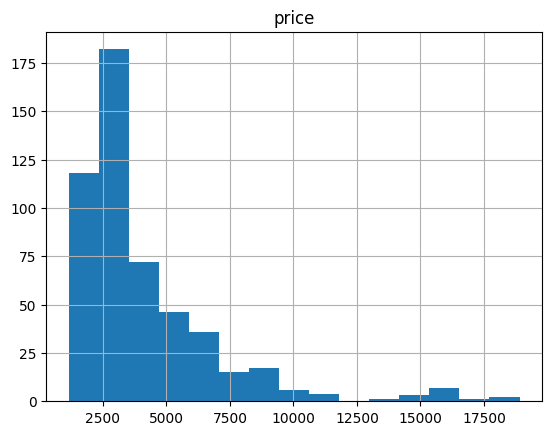

In [ ]:
df.hist(column='price', bins=15)

In [ ]:
df[ df.price > 17000 ] # 100_000



,name,price,img,url,people,cabins,year
429,Saxdor 320 GTO,18656.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/saxdor-320-gto/1778#/a...,6,1.0,2023
430,Sea Ray 265,18900.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sea-ray-265/1273#/avai...,8,0.0,2021


array([[<Axes: title={'center': 'price'}>]], dtype=object)

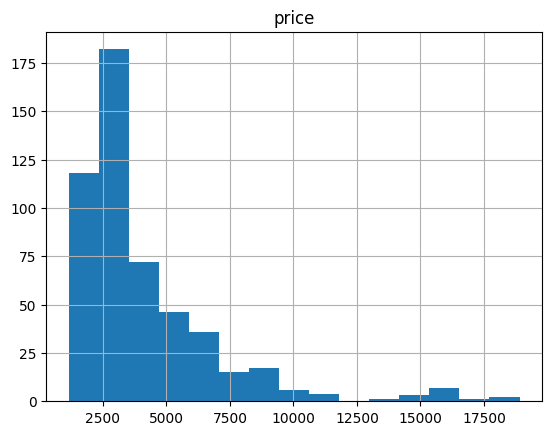

In [ ]:
df[ df.price <= 100000 ].hist(column='price', bins=15)


array([[<Axes: title={'center': 'people'}>]], dtype=object)

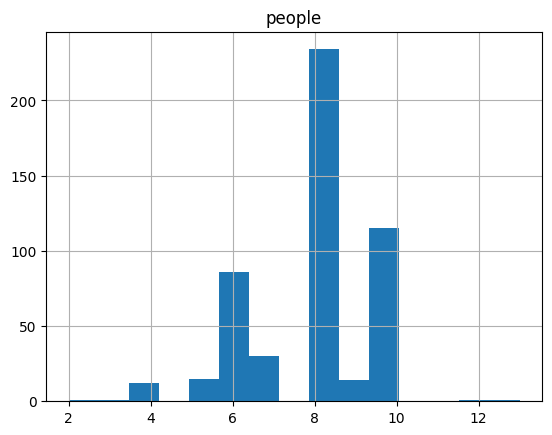

In [ ]:
df.hist(column='people', bins=15)


<Axes: xlabel='people', ylabel='price'>

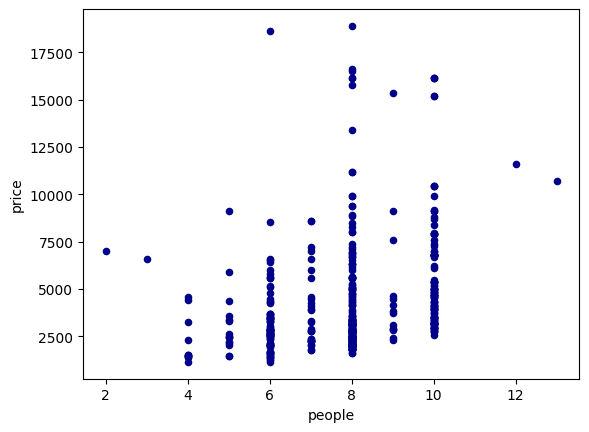

In [ ]:
df.plot.scatter(x='people', y='price', c='DarkBlue')

zadanie 1



In [ ]:
import re
import urllib.request
from bs4 import BeautifulSoup

yacht_data = []

for indeks, url in enumerate(df['url']):
    yacht_info = {
        'max_liczba_załogi': 0,
        'zanurzenie_min': 0,
        'zanurzenie_max': 0,
        'moc_silnika': 0,
        'dlugosc': 0,
        'szerokosc': 0,
        'wysokosc': 0
    }

    try:
        with urllib.request.urlopen(url) as resp:
            processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
    except Exception as e:
        print(e)
        continue

    yacht_technical_data = processed_page.find(class_='tab-2').find(class_='row').select('div')[0].select('div')

    for technical_data in yacht_technical_data:
        param_type, param_data = technical_data.text.split(':')

        try:
            num = int(re.search(r'\d+', param_data).group())
        except AttributeError:
            num = 0

        if 'Moc silnika' in param_type:
            yacht_info['moc_silnika'] = num
        elif 'Zanurzenie min' in param_type:
            yacht_info['zanurzenie_min'] = num
        elif 'Zanurzenie max' in param_type:
            yacht_info['zanurzenie_max'] = num
        elif 'Długość (cm)' in param_type:
            yacht_info['dlugosc'] = num
        elif 'Szerokość (cm)' in param_type:
            yacht_info['szerokosc'] = num
        elif 'Max wysokość w kabinie (cm)' in param_type:
            yacht_info['wysokosc'] = num
        elif 'Max liczba załogi' in param_type:
            yacht_info['max_liczba_załogi'] = num

    print(f"Yacht {indeks + 1} - Informacje techniczne:")
    print("Moc silnika:", yacht_info['moc_silnika'])
    print("Zanurzenie min:", yacht_info['zanurzenie_min'])
    print("Zanurzenie max:", yacht_info['zanurzenie_max'])
    print("Długość:", yacht_info['dlugosc'], "cm")
    print("Szerokość:", yacht_info['szerokosc'], "cm")
    print("Wysokość w kabinie:", yacht_info['wysokosc'], "cm")
    print("Max liczba załogi:", yacht_info['max_liczba_załogi'])
    print("----------------------------------------------")

    yacht_data.append(yacht_info)



Yacht 1 - Informacje techniczne:
Moc silnika: 0
Zanurzenie min: 35
Zanurzenie max: 145
Długość: 780 cm
Szerokość: 280 cm
Wysokość w kabinie: 165 cm
Max liczba załogi: 0
----------------------------------------------
Yacht 2 - Informacje techniczne:
Moc silnika: 4
Zanurzenie min: 30
Zanurzenie max: 130
Długość: 620 cm
Szerokość: 245 cm
Wysokość w kabinie: 155 cm
Max liczba załogi: 4
----------------------------------------------
Yacht 3 - Informacje techniczne:
Moc silnika: 0
Zanurzenie min: 35
Zanurzenie max: 145
Długość: 780 cm
Szerokość: 280 cm
Wysokość w kabinie: 165 cm
Max liczba załogi: 0
----------------------------------------------
Yacht 4 - Informacje techniczne:
Moc silnika: 6
Zanurzenie min: 27
Zanurzenie max: 140
Długość: 720 cm
Szerokość: 250 cm
Wysokość w kabinie: 170 cm
Max liczba załogi: 6
----------------------------------------------
Yacht 5 - Informacje techniczne:
Moc silnika: 30
Zanurzenie min: 45
Zanurzenie max: 55
Długość: 720 cm
Szerokość: 240 cm
Wysokość w kabi

Pierwsze 5 i ostatnie 5 specyfikacje statku

In [ ]:
df = pd.DataFrame.from_dict(yacht_data)
df1=df
df1 = df1.replace(0, "Brak danych")
df1.head(511)

,max_liczba_załogi,zanurzenie_min,zanurzenie_max,moc_silnika,dlugosc,szerokosc,wysokosc
0,Brak danych,35,145,Brak danych,780,280,165
1,4,30,130,4,620,245,155
2,Brak danych,35,145,Brak danych,780,280,165
3,6,27,140,6,720,250,170
4,4,45,55,30,720,240,190
...,...,...,...,...,...,...,...
504,5,40,40,30,708,275,195
505,10,60,170,21,893,305,185
506,10,40,145,10,870,310,184
507,5,50,50,30,708,275,195


Jacht z najmniejsza liczbą załogi


In [ ]:
df[df.max_liczba_załogi == df[df.max_liczba_załogi != 0]['max_liczba_załogi'].min()]




,max_liczba_załogi,zanurzenie_min,zanurzenie_max,moc_silnika,dlugosc,szerokosc,wysokosc
372,2,0,0,90,0,0,0


Rozklad mocy

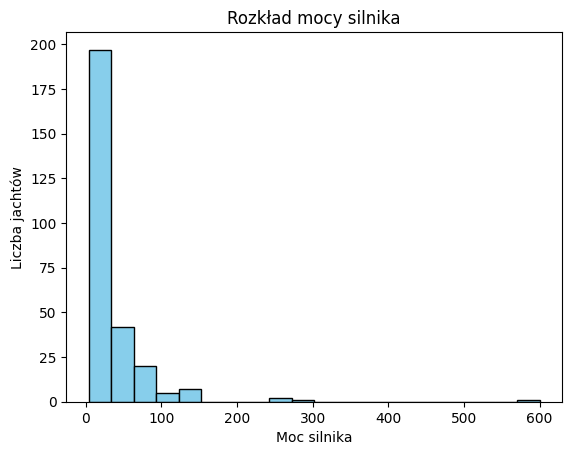

In [ ]:
import matplotlib.pyplot as plt

# Dane przedfiltrowane
df_filtered = df[df['moc_silnika'] != 0]

# Tworzenie histogramu mocy silnika
plt.hist(df_filtered['moc_silnika'], bins=20, color='skyblue', edgecolor='black')

# Dodanie tytułu i opisów osi
plt.title('Rozkład mocy silnika')
plt.xlabel('Moc silnika')
plt.ylabel('Liczba jachtów')

# Wyświetlenie wykresu
plt.show()



Obiejtosci łódek

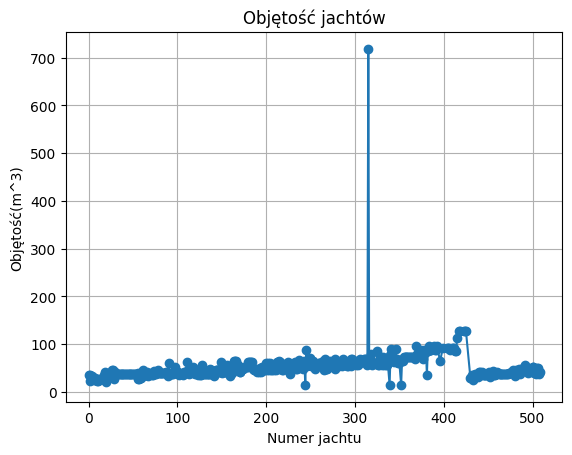

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Obliczanie objętości
df_filtered = df[(df['dlugosc'] != 0) & (df['szerokosc'] != 0) & (df['wysokosc'] != 0)]

# Obliczanie objętości
df_filtered = df_filtered.assign(objętość = lambda x: (x['dlugosc'] * x['szerokosc'] * x['wysokosc']) / 1000000) #zmiana z cm3 na m3
#df_filtered['objętość'] = df_filtered['dlugosc'] * df_filtered['szerokosc'] * df_filtered['wysokosc']/ 1000000 #ta linijka daje warning

# Tworzenie wykresu
plt.plot(df_filtered.index, df_filtered['objętość'], marker='o')
plt.title('Objętość jachtów')
plt.xlabel('Numer jachtu')
plt.ylabel('Objętość(m^3)')
plt.grid(True)
plt.show()